In [1]:
# ignore this
%load_ext music21.ipython21

# User's Guide, Chapter 15: Keys and KeySignatures

(to be written)

In [2]:
from music21 import *

A Key object is derived from a KeySignature object and also a Scale object.

In [3]:
k = key.Key('E-')
k.classes

('Key',
 'KeySignature',
 'DiatonicScale',
 'ConcreteScale',
 'Scale',
 'Music21Object',
 'object')

## Key Context and Note Spelling

`Key` and `KeySignature` objects affect how notes are spelled in some situations.  Let's set up a simple situation of a F-natural whole note in D major and then B-flat minor.

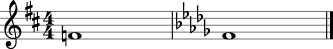

In [4]:
s = stream.Stream()
s.append(key.Key('D'))
s.append(note.Note('F', type='whole'))
s.append(key.Key('b-', 'minor'))
s.append(note.Note('F', type='whole'))
s2 = s.makeMeasures()
s2.show()

When we transpose each note up a half step (`n.transpose(1)`), music21 understands that the first F-natural should become F-sharp, while the second one will fit better as a G-flat.

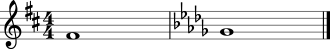

In [5]:
for n in s2.recurse().notes:
    n.transpose(1, inPlace=True)
s2.show()

## Example: Prepare a vocal exercise in all major keys, ascending by step.

*requires v3 or higher*

Let's create a simple exercise in playing or singing thirds.  I think I remember this from the [First Division Band Method](https://www.google.com/search?q=First+Division+Band+Method&tbm=isch) "Blue Book": 

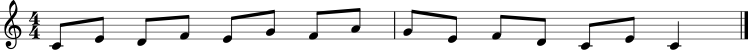

In [6]:
pitchStream = converter.parse("tinyNotation: 4/4 c8 e d f e g f a g e f d c e c4")
pitchStream.show()

This melody does not have a key associated with it.  Let's put a Key of C Major at the beginning of the piece:

In [7]:
k = key.Key('C')
pitchStream.measure(1).insert(0, k)

Note that putting the key of C into the Stream doesn't change what it looks like when we show the Stream, since there are no sharps or flats.  But what makes the difference between an instrumental and a vocal exercise is the act of transposition. When we transpose the `Key` object up 1 semitone, to D-flat major, it will show up:

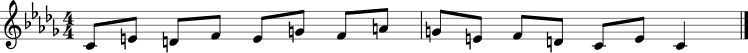

In [8]:
k.transpose(1, inPlace=True)
pitchStream.show()

Now the key signature is D-flat, but the notes are still in C-major, so we should transpose them also:

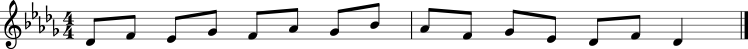

In [9]:
for n in pitchStream.recurse().notes:
    n.transpose(1, inPlace=True)
    
pitchStream.show()

Notice that we choose a semitone transposition and not a diatonic transposition such as minor second (`"m2"`); minor second would work just as good in this case, but then to do another half-step up, we would need to remember to transpose by an augmented unison (`"A1"`) so that D-flat became D-natural and not E-double-flat.  The semitone transposition is smart enough to make sure that the `Key` object remains between six-flats and six-sharps. Not only that, but the notes will match the best spelling for the current key signature.

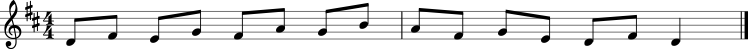

In [10]:
k.transpose(1, inPlace=True)
for n in pitchStream.recurse().notes:
    n.transpose(1, inPlace=True)
pitchStream.show()

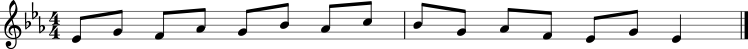

In [11]:
k.transpose(1, inPlace=True)
for n in pitchStream.recurse().notes:
    n.transpose(1, inPlace=True)
pitchStream.show()

So, we can make a nice, ascending vocal exercise by varying the transposition amount from 0 to 7 (or however high you can sing) and putting each of the two-measure excerpts together into one Part.

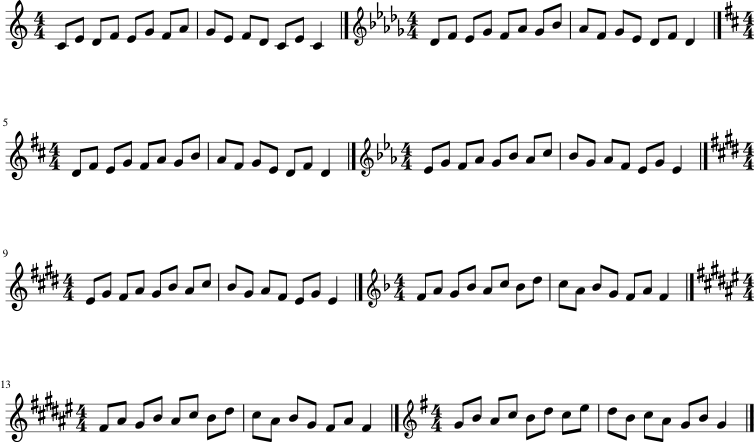

In [12]:
out = stream.Part()
for i in range(0, 8):
    pitchStream = converter.parse("tinyNotation: 4/4 c8 e d f e g f a g e f d c e c4")
    k = key.Key('C')
    pitchStream.measure(1).insert(0, k)
    k.transpose(i, inPlace=True)
    for n in pitchStream.recurse().notes:
        n.transpose(i, inPlace=True)
    for m in pitchStream:
        out.append(m)
out.show()

And we can listen to it as well:

In [13]:
out.show('midi')